## Day 38: Rental Car Data Analysis  

For this challenge, you are going to preprocess and analyze 
a dataset of car rental services. You are going to use the 
rental_car_analysis dataset. 

1. Write code to check how many rows are in the dataset. 
Check the sum of duplicates in the "City" column. 


In [3]:
import pandas as pd
df = pd.read_csv("rental_car_analysis.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          100 non-null    object 
 1   City          100 non-null    object 
 2   Car Type      100 non-null    object 
 3   Rental Price  50 non-null     float64
 4   Discount      66 non-null     float64
 5   Final Price   100 non-null    float64
dtypes: float64(3), object(3)
memory usage: 4.8+ KB


In [7]:
df.duplicated(subset=["City"]).sum()

np.int64(90)

2. Write code to find missing data in the generated 
DataFrame. Which rows have missing data? 


In [9]:
df.isna().sum()

Date             0
City             0
Car Type         0
Rental Price    50
Discount        34
Final Price      0
dtype: int64

3. Using pandas, fill in the missing values using the column 
median (numeric columns only). 


In [11]:
# Filing missing values with the median of the column 
df2 = df.fillna(df[["Rental Price", "Discount"]].median())

# Checking for missing values
df2.isnull().sum()

Date            0
City            0
Car Type        0
Rental Price    0
Discount        0
Final Price     0
dtype: int64

4. Which city brought in the most revenue? 


In [21]:
most_revenue = df2.groupby("City")["Final Price"].sum().idxmax()
most_revenue

print(f"The city with the most revenue is {most_revenue}")

The city with the most revenue is Phoenix


5. Which car type brought in the most money? 


In [23]:
car_type = df2.groupby("Car Type")["Final Price"].sum().idxmax()
car_type
print(f"Car Type with most revenue is {car_type}")

Car Type with most revenue is Van


6. Which car type is the most expensive to rent? 


In [25]:
car_rent = df2.groupby("Car Type")["Rental Price"].sum().idxmax()

print(f"The most expensive car type to rent is {car_rent}")


The most expensive car type to rent is Van


7. Which two cities brought in the least amount of revenue?  


In [28]:
least_revenue = df2.groupby("City")["Final Price"].sum().sort_values(ascending=False).tail(2)
least_revenue

print(f"The city with the least revenue are {least_revenue}")

The city with the least revenue are City
Houston        951.338397
San Antonio    870.153279
Name: Final Price, dtype: float64


8. Using pandas plot() function and Matplotlib, plot a bar 
plot of the total revenue brought in by each type of car. 


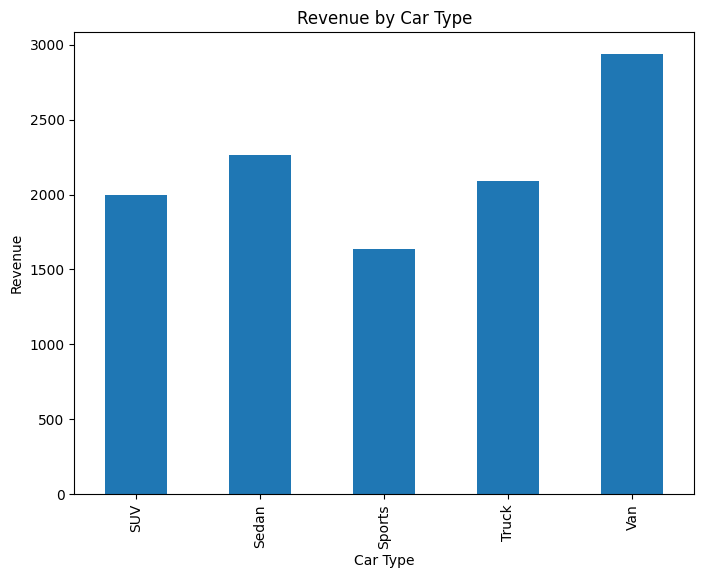

In [35]:
import matplotlib.pyplot as plt 

# Group the data by car type and sum the revenue
car_revenue = df2.groupby('Car Type')['Final Price'].sum()

# Plot the revenue of each car type
plt.figure(figsize=(8, 6))

car_revenue.plot(kind='bar', x='car_type', y='car_revenue')

plt.title("Revenue by Car Type", fontsize=12)
plt.ylabel(ylabel="Revenue")
plt.show()


9. What is the total revenue of this car rental business? 


In [38]:
total_revenue = df2["Final Price"].sum()
print(f"The total revenue is {total_revenue:.2f}")

The total revenue is 10926.06


10. What would be the total revenue if no discount was given? 

In [39]:
no_discount_revenue = df2["Rental Price"].sum()
print(f"The total revenue before disount is {no_discount_revenue:.2f}")

The total revenue before disount is 12542.00
